<a href="https://colab.research.google.com/github/Aleena24/CV_lab/blob/main/lab5_low_high_pass_filter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [42]:
image = cv2.imread('/content/drive/MyDrive/research_dataset/BSD100/300091.png', cv2.IMREAD_GRAYSCALE)

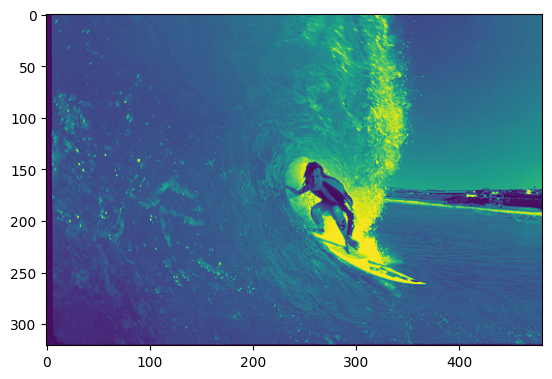

In [45]:
plt.imshow(image)

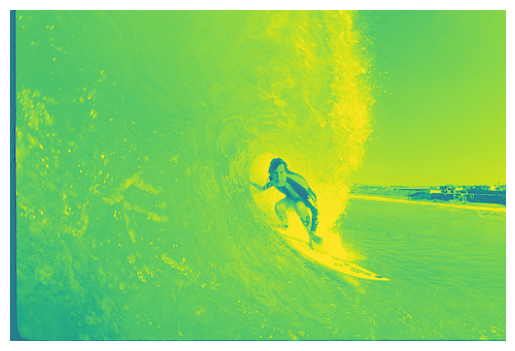

In [47]:
img = np.fft.fft2(image)
plt.imshow(np.log1p(np.abs(image)))
plt.axis('off')
plt.show()

# Shifiting low frequency component to centere of the image


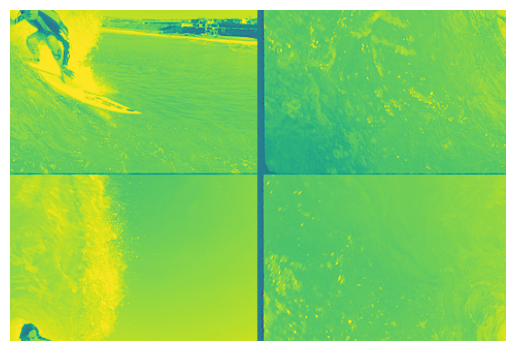

In [48]:
Fshift=np.fft.fftshift(image)
plt.imshow(np.log1p(np.abs(Fshift)))
plt.axis('off')
plt.show()

# Filter: Low pass filter

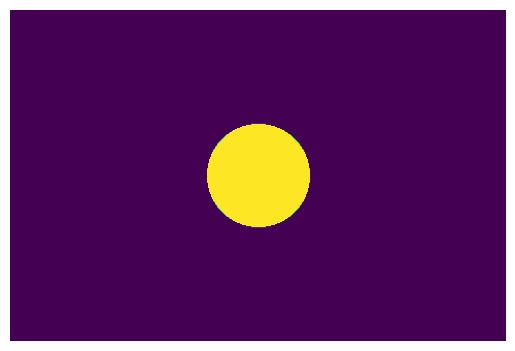

In [49]:
M,N = img.shape
H = np.zeros((M,N), dtype=np.float32)
D0 = 50

for u in range(M):
  for v in range(N):
    D = np.sqrt((u-M/2)**2 + (v-N/2)**2)
    if D <= D0:
      H[u,v] = 1
    else:
      H[u,v] = 0

plt.imshow(H)
plt.axis('off')
plt.show()


# Ideal Low Pass Filtering


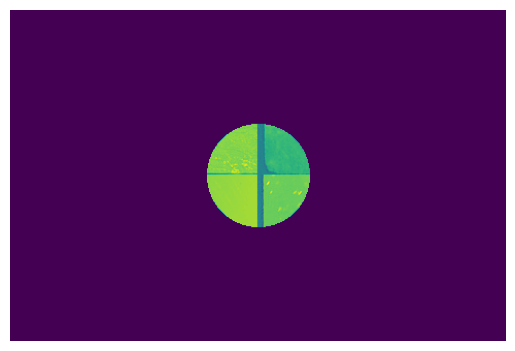

In [51]:
Gshift = Fshift * H
plt.imshow(np.log1p(np.abs(Gshift)))
plt.axis('off')
plt.show()

# Inverse the shifted Fourier Transform


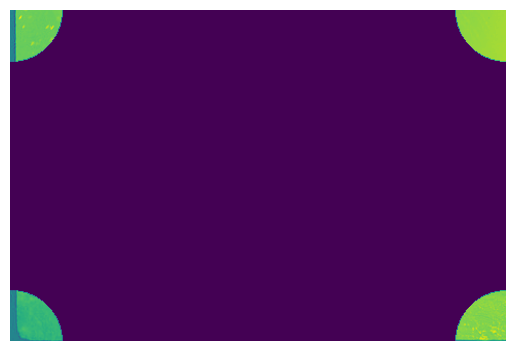

In [52]:
G = np.fft.ifftshift(Gshift)
plt.imshow(np.log1p(np.abs(G)))
plt.axis('off')
plt.show()

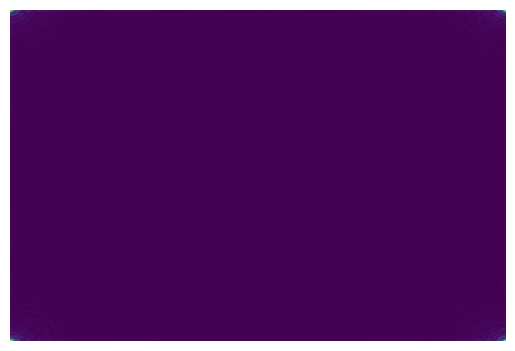

In [55]:
g = np.abs(np.fft.ifft2(G))
plt.imshow(g)
plt.axis("off")
plt.show()

# Filter: High pass filter

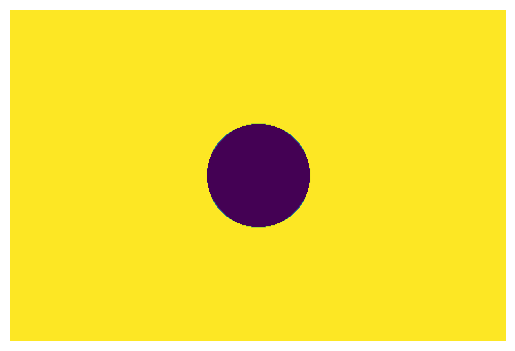

In [56]:
H = 1 - H

plt.imshow(H)
plt.axis("off")
plt.show()

# Ideal High Pass Filtering

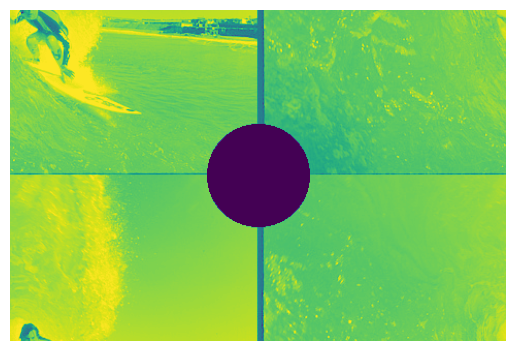

In [57]:
Gshift = Fshift * H
plt.imshow(np.log1p(np.abs(Gshift)))
plt.axis("off")
plt.show()

# Inverse Fourier Transform

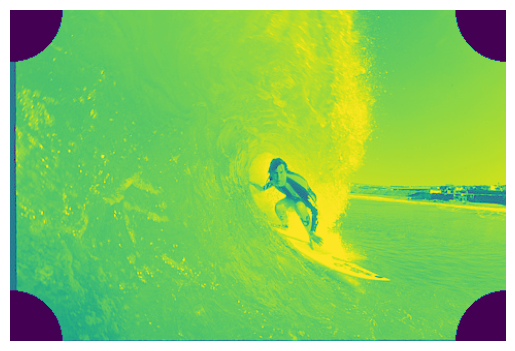

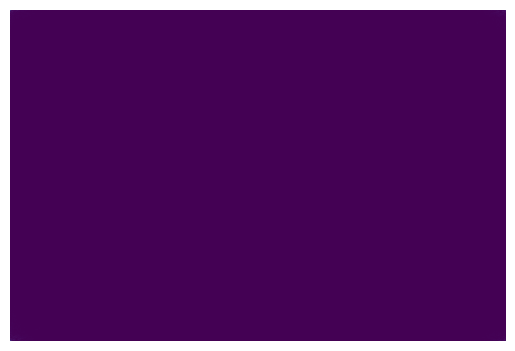

In [58]:
G = np.fft.ifftshift(Gshift)
plt.imshow(np.log1p(np.abs(G)))
plt.axis("off")
plt.show()

g = np.abs(np.fft.ifft2(G))
plt.imshow(g)
plt.axis("off")
plt.show()